### Iris Flowers Classification ML Project :

In [1]:
import pandas as pd
import numpy as np

### Reading csv file

In [2]:
columns = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
df = pd.read_csv('irisdata.csv')
df.columns = columns
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Data preprocessing

In [3]:
from sklearn.utils import shuffle
df = shuffle(df)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['class'])
y

array([1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0])

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('class',axis=1))
X

array([[0.38888889, 0.375     , 0.54237288, 0.5       ],
       [0.47222222, 0.375     , 0.59322034, 0.58333333],
       [0.25      , 0.29166667, 0.49152542, 0.54166667],
       [0.30555556, 0.58333333, 0.08474576, 0.125     ],
       [0.72222222, 0.5       , 0.79661017, 0.91666667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.22222222, 0.54166667, 0.11864407, 0.16666667],
       [0.72222222, 0.45833333, 0.66101695, 0.58333333],
       [0.38888889, 0.41666667, 0.54237288, 0.45833333],
       [0.94444444, 0.41666667, 0.86440678, 0.91666667],
       [0.55555556, 0.33333333, 0.69491525, 0.58333333],
       [0.33333333, 0.16666667, 0.45762712, 0.375     ],
       [0.08333333, 0.5       , 0.06779661, 0.04166667],
       [0.19444444, 0.5       , 0.03389831, 0.04166667],
       [0.52777778, 0.375     , 0.55932203, 0.5       ],
       [0.05555556, 0.125     , 0.05084746, 0.08333333],
       [0.36111111, 0.375     , 0.44067797, 0.5       ],
       [0.52777778, 0.08333333,

###  Building and Fine tunning the model

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model_params = {
    'logistic_reg':{
        'model': LogisticRegression(solver='liblinear'),
        'params':{
            'penalty':['l1','l2'],
            'C':[0.5, 1, 10]
        }
    },
    'svc': {
        'model': SVC(),
        'params': {
            'C':[0.5, 1, 10],
            'kernel':['rbf','poly']
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'weights':['uniform','distance'],
            'n_neighbors':[3, 5, 7]
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[5, 50, 100],
            'criterion':['gini','entropy']
        }
    }
}

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_reg,0.933333,"{'C': 10, 'penalty': 'l1'}"
1,svc,0.970370,"{'C': 0.5, 'kernel': 'poly'}"
2,knn,0.970370,"{'n_neighbors': 5, 'weights': 'uniform'}"
3,random_forest,0.977778,"{'criterion': 'gini', 'n_estimators': 5}"


In [10]:
knn = KNeighborsClassifier(n_neighbors= 3, weights= 'uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2])

### Ploting the result

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0, 0],
       [0, 4, 0],
       [0, 0, 6]], dtype=int64)

Text(24.0, 0.5, 'Truth')

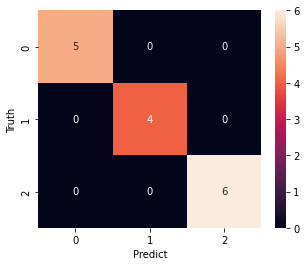

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True)

plt.xlabel('Predict')
plt.ylabel('Truth')